In [1]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as mcolors
import re
import unicodedata

In [2]:
df = pd.read_pickle("../tutorial_3_twitter_networks_and_visualization/Raw_Tweets.pkl")
df = df[0:1000]

In [3]:
# pre-process tweets
def strip_links(text):
    link_regex    = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links         = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], ' ')    
    return text

def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

def process_tweets(tweet):
    tweet = strip_links(tweet)
    tweet = remove_special_characters(tweet)
    return tweet

df.loc[:, 'text'] = df.text.apply(process_tweets)

In [ ]:
text = ' '.join(df.text.tolist()).lower()

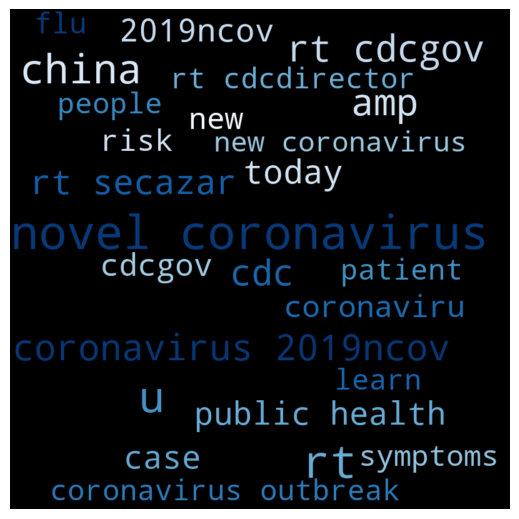

In [7]:
# create the wordcloud object 
wordcloud = WordCloud(width = 800, height = 800,
                #background_color ='white',
                stopwords = STOPWORDS,
                max_words=25,
                colormap='Blues', # Blues
                collocations = True,
                prefer_horizontal=1.0,
                min_font_size = 10).generate(text)

# plot word cloud
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.margins(x=0, y=0)
plt.axis("off")
plt.tight_layout(pad = 0)